In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
dataset = pd.read_csv("./assets/Preprocessing_result.csv")
dataset

,Unnamed: 0,Umur,SIM,Jenis_Kelamin,Kode_Daerah,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Kendaraan_Rusak
0,0,0.153846,1.0,0.0,33.0,1.0,0.047251,152.0,0.301038,0,0.0
1,1,0.430769,1.0,1.0,39.0,3.0,0.043104,29.0,0.512111,0,1.0
2,2,0.015385,1.0,1.0,46.0,1.0,0.056002,160.0,0.377163,0,0.0
3,3,0.584615,1.0,0.0,48.0,2.0,0.000000,124.0,0.183391,0,0.0
4,4,0.461538,1.0,1.0,35.0,3.0,0.059953,88.0,0.636678,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
285826,285826,0.046154,1.0,0.0,4.0,1.0,0.043454,152.0,0.716263,0,0.0
285827,285827,0.015385,1.0,0.0,46.0,1.0,0.078239,152.0,0.138408,0,0.0
285828,285828,0.046154,1.0,0.0,50.0,1.0,0.087661,152.0,0.747405,0,0.0
285829,285829,0.738462,1.0,1.0,7.0,2.0,0.051853,124.0,0.899654,0,0.0


In [34]:
array_lama_berlangganan = dataset['Lama_Berlangganan'].to_numpy()
array_premi = dataset['Premi'].to_numpy()


In [4]:
def euclid_distance(x1, x2, y1, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [5]:
def recalculate_clusters(array1, array2, centroids, k):
    clusters = {}
    for i in range(k):
        clusters[i] = []
    for i in range(len(array1)):
        euc_dist = []
        distance = 0
        index = 0
        for j in range(k):
            if distance != 0:
                temp = euclid_distance(array1[i], centroids[j][0], array2[i], centroids[j][1])
                if temp < distance:
                    distance = temp
                    index = j
            else:
                distance = euclid_distance(array1[i], centroids[j][0], array2[i], centroids[j][1])
                index = 0
        clusters[index].append([array1[i], array2[i]])
    return clusters

In [6]:
def recalculate_centroids(centroids, clusters, k):
    new_centroids = []
    for i in range(k):
        new_centroids.append([])
    for i in range(k):
        mean= np.mean(clusters[i], axis=0)
        new_centroids[i].append(mean[0]) 
        new_centroids[i].append(mean[1])
    return new_centroids

In [7]:
def checkRepeatingCentroids(old_centroid, new_centroid, k):
    count = 0
    for i in range(k):
        if old_centroid[i][0] == new_centroid[i][0] and old_centroid[i][1] == new_centroid[i][1]:
            count = count + 1
    
    if count == k:
        return True
    return False

In [8]:
def KMean(data_1, data_2, centroids, k):
    clusters = []
    while True:
        clusters = recalculate_clusters(data_1, data_2, centroids, k)
        new_centroids = recalculate_centroids(centroids, clusters, k)
        if checkRepeatingCentroids(centroids, new_centroids, k):
            break
        centroids = np.copy(new_centroids)
    return clusters, centroids

# Find the right K with Elbow Method

In [9]:
WCSS = []
np.random.seed(1)
for k in range(1, 9):
    centroids = [[random.choice(array_premi), random.choice(array_lama_berlangganan)] for i in range(k)]
    clusters, centroids = KMean(array_premi, array_lama_berlangganan, centroids, k)
    total = 0
    for idx, cluster in clusters.items():
        for i, val in enumerate(cluster):
            distance = euclid_distance(val[0], centroids[idx][0], val[1], centroids[idx][1])
            total = total + distance
    avg = total / k
    WCSS.append(avg)
    
    
WCSS

[69351.00660179404,
 19380.042961710442,
 8260.334811097227,
 5108.047292957334,
 3268.2976318597402,
 2432.998343525202,
 1838.0786893869404,
 1621.0016716234907]

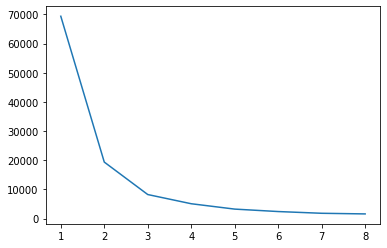

In [10]:
plt.plot([1,2,3,4,5,6,7,8], WCSS )
plt.show()

In [33]:
K = 3
centroids = [[random.choice(array_premi), random.choice(array_lama_berlangganan)] for i in range(k)]
clusters, centroids = KMean(array_premi, array_lama_berlangganan, centroids, K)

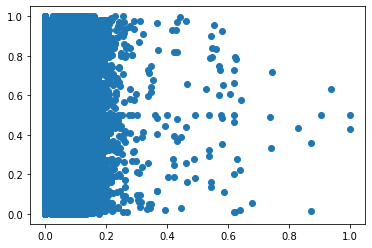

In [27]:
plt.scatter(array_premi, array_lama_berlangganan)
plt.show()

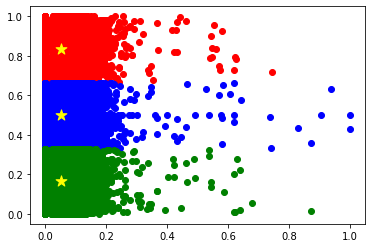

In [32]:
colors = ['red', 'blue', 'green']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
for i in range(K):
    plt.scatter([j[0] for j in clusters[i]], [j[1] for j in clusters[i]], c=colors[i], label=labels[i])
    plt.scatter(centroids[i][0], centroids[i][1], marker = "*", c="yellow", label="centroid", s=130)
plt.show()